### Проект:  E-commerce — Выявление профилей потребления

**Описание проекта**

Интернет-магазину товаров для дома «Пока всё ещё тут» необходимо изучить поведение покупателей и провести анализ ассортимента товаров. Это поможет магазину стать более привлекательным для клиентов, а покупателям — создать дом своей мечты.

**Цель исследования**

Сегментация покупателей по их потребительскому профилю для эффективной рассылки рекламных материалов.

**Ход исследования**

1. Загрузка и знакомство с данными


2. Предобработка данных

- Замена типа данных в столбцах    
- Дубликаты в датафрейме  
- Количественные значения (обработка выбрасов)  
- Создание нового столбца (общая сумма)  

3. Исследовательский анализ

- Просмотр общей информации (уникальное количество покупателей, заказов, товаров)  
- Сегментация покупателей (методом K-Means )  
Параметры для кластеризации K-Means: средний чек (средняя сумма заказа для каждого покупателя), среднее количество товара на покупателя, средняя цена товара для покупателя.  
- Группировка товаров по категориям (создание категорий на основе характеристик товаров)  
- Исследование получившихся сегментов (характеристики сегментов, средний чек, частота покупок,время между покупками, общая сумма покупок)  
- Исследование сезонности товаров в рамках сегмента (анализ покупок по месяцам/сезонам)  
- Исследование категории товаров наиболее популярны среди различных сегментов.  
  
4. Проверка гипотез

- Различие среднего чека между кластерами:

H0: Нет различий в среднем чеке между кластерами.  
H1: Есть различия в среднем чеке между кластерами.

- Различие частоты покупок между кластерами:

H0: Нет различий в частоте покупок между кластерами.  
H1: Есть различия в частоте покупок между кластерами.


5. Выводы 

**Описание данных**

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

• date — дата заказа;  
• customer_id — идентификатор покупателя;  
• order_id — идентификатор заказа;  
• product — наименование товара;  
• quantity — количество товара в заказе;  
• price — цена товара.  

### Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

from collections import Counter
import re

from scipy import stats

In [2]:
# Установка максимальной ширины столбцов
pd.set_option('display.max_colwidth', None) 

In [3]:
df = pd.read_csv('/datasets/ecom_dataset_upd.csv')

In [4]:
# функция для просмотра основной информации о таблицах
def analyze_df(df):
    print('5 случайных строк датафрейма')
    display(df.sample(5))
    print('---------------------------------------------------------------------------------------------------------')
    print('Информации о датафрейме')
    display(df.info())
    print('---------------------------------------------------------------------------------------------------------')
    print('Пропуски')
    display(df.isna().sum())
    print('---------------------------------------------------------------------------------------------------------')
    print('Явные дубликаты')
    display(df.duplicated().sum())
    print('---------------------------------------------------------------------------------------------------------')
    print('Проверка количественных значений')
    display(df.describe())

In [5]:
analyze_df(df)

5 случайных строк датафрейма


,date,customer_id,order_id,product,quantity,price
3503,2019051003,ff31d802-dae6-484d-a3dc-c9723f1cb538,71363,Стремянки Colombo Leonardo 2 ступени G300A02W серая 3646,1,2999.0
3274,2019042912,d9f01c41-8d14-4231-9396-07a265cb39ef,14704,Пеларгония розебудная Queen Ingrid укорененный черенок,1,135.0
2852,2019041508,f623d7c3-667a-4184-9963-6e44c4ab82a4,14645,Петуния простая рассада однолетних цветов в кассете по 10 шт,4,210.0
397,2018102409,67c1705b-597d-4d06-ab3b-7fd7c3038198,68736,"Сушилка для белья потолочная ЛИАНА ЛЮКС 140, ЛДН-Т",1,449.0
1347,2018122412,c971fb21-d54c-4134-938f-16b62ee86d3b,69566,"Шнур резиновый для тележки 200 см белый, 1209004",4,104.0


---------------------------------------------------------------------------------------------------------
Информации о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


None

---------------------------------------------------------------------------------------------------------
Пропуски


date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

---------------------------------------------------------------------------------------------------------
Явные дубликаты


0

---------------------------------------------------------------------------------------------------------
Проверка количественных значений


,date,order_id,quantity,price
count,7.474000e+03,7474.000000,7474.000000,7474.000000
mean,2.018913e+09,49449.884265,2.362858,478.737501
std,4.278878e+05,32679.642404,14.500497,901.615895
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019022e+09,14833.000000,1.000000,97.000000
50%,2.019051e+09,68768.000000,1.000000,135.000000
75%,2.019063e+09,71257.750000,1.000000,439.000000
max,2.020013e+09,112789.000000,1000.000000,14917.000000


### Предобработка данных

#### Замена типа данных в столбцах.

In [6]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         7474 non-null   datetime64[ns]
 1   customer_id  7474 non-null   object        
 2   order_id     7474 non-null   int64         
 3   product      7474 non-null   object        
 4   quantity     7474 non-null   int64         
 5   price        7474 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 350.5+ KB


#### Дубликаты в датафрейме

In [8]:
# Группировка по всем полям, кроме даты
#Функция filter применяется к каждой группе.
#Она возвращает только те группы, которые содержат более одной строки (т.е. дубликаты).
#Если группа содержит только одну строку, она будет отфильтрована.
duplicates = df.groupby(['customer_id', 'order_id', 'product', 'quantity', 'price']).filter(lambda x: len(x) > 1)

duplicates.sort_values(by=['customer_id', 'order_id', 'product', 'quantity', 'price'])


,date,customer_id,order_id,product,quantity,price
2237,2019-03-07 10:00:00,0184f535-b60a-4914-a982-231e3f615206,14566,Пеларгония розебудная Margaretha укорененный черенок,1,135.0
2241,2019-03-07 11:00:00,0184f535-b60a-4914-a982-231e3f615206,14566,Пеларгония розебудная Margaretha укорененный черенок,1,135.0
2238,2019-03-07 10:00:00,0184f535-b60a-4914-a982-231e3f615206,14566,Пеларгония розебудная Mary укорененный черенок,1,135.0
2242,2019-03-07 11:00:00,0184f535-b60a-4914-a982-231e3f615206,14566,Пеларгония розебудная Mary укорененный черенок,1,135.0
2239,2019-03-07 10:00:00,0184f535-b60a-4914-a982-231e3f615206,14566,Пеларгония розебудная Prins Nikolai укорененный черенок,1,135.0
...,...,...,...,...,...,...
6716,2019-10-30 07:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
1208,2018-12-14 23:00:00,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,69369,Новогоднее дерево Ель канадская Коника ртк 343 d-9 см,1,389.0


In [9]:
# проверяем потерю в данных.
data = df.copy()
a, b = len(data), len(df.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price']))
c =a-b
a, b, c, round(c/a * 100, 2)

(7474, 5610, 1864, 24.94)

**Потеря в данных 25%. Неизвестно, почему появились дубликаты заказов. Возможно, это связано с некорректной выгрузкой информации, из-за чего заказы были дублированы, а даты указаны неправильно.
Также возможно, что пользователи повторяли заказы несколько раз, но это маловероятно. Поэтому принимаем решение удалить дубликаты для более глубокого анализа данных.**

In [10]:
# Удаляем дубликаты по дате
df = df.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'])

In [11]:
df[df['order_id'] == 73136 ]

,date,customer_id,order_id,product,quantity,price
6716,2019-10-30 07:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0


In [12]:
df.shape[0]

5610

In [13]:
df.groupby(['date', 'order_id', 'product', 'quantity', 'price']).filter(lambda x: len(x) > 1)

,date,customer_id,order_id,product,quantity,price
4297,2019-06-02 10:00:00,f1222eaa-d09d-4bff-ab4e-bea6fe3f68a8,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0
4298,2019-06-02 10:00:00,95872093-2887-4ce8-8468-19234990e7d7,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0


In [14]:
df = df.drop_duplicates(subset=['date', 'order_id', 'product', 'quantity', 'price'])

In [15]:
df.shape[0]

5609

In [16]:
df[df['order_id'] == 71571 ]

,date,customer_id,order_id,product,quantity,price
4297,2019-06-02 10:00:00,f1222eaa-d09d-4bff-ab4e-bea6fe3f68a8,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0


**Разным пользователям присвоен один и тот же заказ, удаляем один.**

In [17]:
df.groupby(['date', 'customer_id', 'product', 'quantity', 'price']).filter(lambda x: len(x) > 1)

,date,customer_id,order_id,product,quantity,price
1055,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69175,Салатник ВОЛАРЭ БЛЭК 16 см G9403 Luminarc,6,97.0
1056,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69175,Тарелка суповая ВОЛАРЭ БЛЭК 23 см G9402 Luminarc,3,127.0
1057,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69176,Салатник ВОЛАРЭ БЛЭК 16 см G9403 Luminarc,6,97.0
1058,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69176,Тарелка суповая ВОЛАРЭ БЛЭК 23 см G9402 Luminarc,3,127.0
1105,2018-12-04 19:00:00,b2da4ddc-71b5-499b-9806-d59c7a7e6cf5,69207,Чайник электрический ВАСИЛИСА Т33-2000 нержавеющая сталь красный 2000 Вт 2 л,1,749.0
1106,2018-12-04 19:00:00,b2da4ddc-71b5-499b-9806-d59c7a7e6cf5,69208,Чайник электрический ВАСИЛИСА Т33-2000 нержавеющая сталь красный 2000 Вт 2 л,1,749.0
1486,2019-01-12 11:00:00,364754b9-56fd-49b5-b6fb-d1fca7ca82f9,69795,Гладильная доска НИКА LORA FASHION HLF 123х46 см,1,1912.0
1487,2019-01-12 11:00:00,364754b9-56fd-49b5-b6fb-d1fca7ca82f9,69796,Гладильная доска НИКА LORA FASHION HLF 123х46 см,1,1912.0
1526,2019-01-16 15:00:00,fb2f95f0-1f30-4e6a-a75c-92d1e2d341e3,69850,"Сушилка для белья на батарею, СБ5-45, НИКА",1,134.0
1527,2019-01-16 15:00:00,fb2f95f0-1f30-4e6a-a75c-92d1e2d341e3,69851,"Сушилка для белья на батарею, СБ5-45, НИКА",1,134.0


In [18]:
# проверяем потерю в данных.
a, b = len(data), len(df.drop_duplicates(subset=['date', 'customer_id', 'product', 'quantity', 'price']))
c =a-b
a, b, c, round(c/a * 100, 2)

(7474, 5591, 1883, 25.19)

In [19]:
df = df.drop_duplicates(subset=['date', 'customer_id', 'product', 'quantity', 'price'])

In [20]:
df.shape[0]

5591

**В датафрейме обнаружены заказы с разными идентификаторами, но с полным совпадением по остальным параметрам. Вероятно, такие ошибки стали следствием технических сбоев. Мы удаляем эти дубликаты, потери составили  0,32%.**

In [21]:
df.groupby('product').filter(lambda x: x['price'].nunique() > 1).sort_values(by='product')


,date,customer_id,order_id,product,quantity,price
256,2018-10-15 09:00:00,092ef2d7-30d2-4d15-9c40-35af6973f28b,68650,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,1,2324.0
1821,2019-02-13 22:00:00,aa4058c4-7f20-4df1-ab65-24d47011026b,70250,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,1,1874.0
2114,2019-03-01 15:00:00,e574a1f2-4102-412c-af15-dde56abb7bf7,70537,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",23,56.0
2847,2019-04-14 21:00:00,7cf68221-3c89-4b67-923a-fca0292c752e,71140,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",1,59.0
1999,2019-02-25 09:00:00,075873aa-644c-4a09-9253-204f3156ac7b,70438,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",20,56.0
...,...,...,...,...,...,...
1799,2019-02-12 11:00:00,df0ca4d7-34b7-40ba-a3b7-f7ed82c07220,70223,Эвкалипт Гунни d-17 см h-60 см,1,1409.0
4643,2019-06-05 14:00:00,f5a97bf3-abf5-4813-9f95-923ff4b37d00,71615,Эвкалипт Гунни d-17 см h-60 см,1,1762.0
2619,2019-04-02 15:00:00,d3a1a9d9-4a3f-4c18-bfb2-0d23abf348bc,70978,Эвкалипт Гунни d-17 см h-60 см,1,1762.0
5870,2019-07-15 22:00:00,48315e11-dd93-4347-b842-c064e21bd01d,71993,Эвкалипт Гунни d-17 см h-60 см,1,1762.0


In [22]:
df.groupby('order_id').filter(lambda x: x['customer_id'].nunique() > 1)  

,date,customer_id,order_id,product,quantity,price
512,2018-10-28 22:00:00,0b5ce2c7-acef-4a9a-b821-61a44ed05557,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0
538,2018-10-30 21:00:00,c1dd5c0e-51db-4a5d-91a3-5374cb20043d,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0
1154,2018-12-10 12:00:00,2f955596-4b13-432e-93f3-6433395aafe6,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъярусная,1,164.0
1160,2018-12-10 16:00:00,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъярусная,1,164.0
1177,2018-12-11 21:00:00,954172a5-634c-4a50-941d-9db6d15a7377,69310,"Муляж Груша желтый 9,5 см полиуретан",7,59.0
...,...,...,...,...,...,...
6508,2019-10-04 08:00:00,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0
6538,2019-10-07 20:00:00,2ac05362-3ca7-4d19-899c-7ba266902611,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0
6576,2019-10-10 22:00:00,31a39955-8a93-42f3-8839-04a9693632a7,72778,Шеффлера Голд Капелла d-12 см h-25 см,1,149.0
6601,2019-10-13 15:00:00,b1dbc7c4-3c84-40a7-80c9-46e2f79d24ad,72950,Кастрюля эмалированная Стэма С-1624 12 л цилиндрическая без рисунка 1506037,1,974.0


In [23]:
duplicate_order_ids = df.groupby('order_id').filter(lambda x: x['customer_id'].nunique() > 1)['order_id'].unique()
duplicate_order_ids

array([68785, 69283, 69310, 69345, 69410, 69485, 69531, 69833, 70114,
       70542, 70631, 70726, 70808, 70903, 70946, 71054, 71226, 71461,
       71480, 71542, 71648, 71663, 14872, 72188, 72778, 72790, 72845,
       72950])

In [24]:
# Удаляем дублирующиеся строки, оставляя только одну
df = df[~(df['order_id'].isin(duplicate_order_ids) & df.duplicated(subset=['order_id'], keep='first'))]

In [25]:
df[df['order_id'] == 72845 ]

,date,customer_id,order_id,product,quantity,price
6504,2019-10-03 14:00:00,d8465f63-35db-4809-aff3-a8f7ebfc257f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0


In [26]:
# проверяем потерю в данных.
a, b = len(data), len(df.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price']))
c =a-b
a, b, c, round(c/a * 100, 2)

(7474, 5555, 1919, 25.68)

**Удалили повторяющиеся строки по id заказа.**

#### Количественные значения

In [27]:
df.describe()

,order_id,quantity,price
count,5555.000000,5555.000000,5555.000000
mean,55883.677408,2.590459,529.101005
std,32478.207842,16.472843,972.250758
min,12624.000000,1.000000,9.000000
25%,14810.500000,1.000000,90.000000
50%,69195.000000,1.000000,150.000000
75%,71929.000000,1.000000,524.000000
max,112789.000000,1000.000000,14917.000000


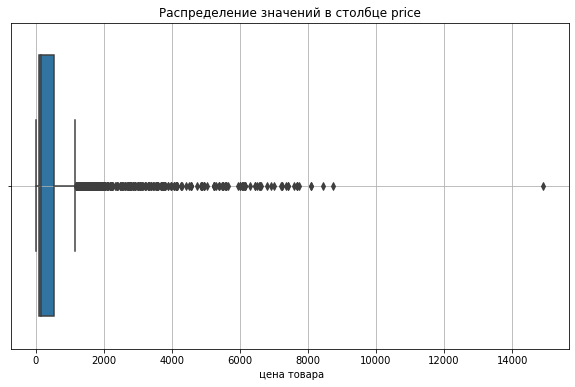

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Распределение значений в столбце price')
plt.xlabel(' цена товара')
plt.grid(True)
plt.show()


In [29]:
df[df['price']> 8000 ]

,date,customer_id,order_id,product,quantity,price
1981,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,"Сумка-тележка хозяйственная Andersen Alu Star Shopper, Hava, синяя 115-103-90",1,8437.0
2697,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,"Сумка-тележка хозяйственная Andersen Royal Shopper, Hera, синяя 166-004-90",1,8737.0
2997,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,Сумка-тележка хозяйственная Rolser MNB019 rojo LOGIC DOS+2 красная,1,8077.0
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая,1,14917.0
7436,2020-01-26 19:00:00,04416514-5346-4f90-93e3-fb7365e2ee8c,109758,Сумка-тележка хозяйственная Rolser MNB019 rojo LOGIC DOS+2 красная,1,8077.0


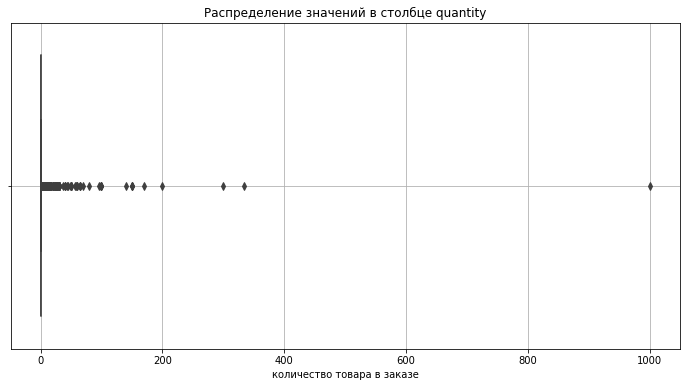

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['quantity'])
plt.title('Распределение значений в столбце quantity')
plt.xlabel('количество товара в заказе')
plt.grid(True)
plt.show()



In [31]:
df[df['quantity' ] >= 100 ]

,date,customer_id,order_id,product,quantity,price
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014",150,38.0
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59.0
1103,2018-12-04 17:00:00,7d255526-fcc2-4f79-b28a-217d7d2373a8,69206,"Щетка для посуды *ОЛЯ*, Мультипласт 1807010",100,26.0
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0
1555,2019-01-21 09:00:00,8eabcaca-e8c8-4eee-9079-4ff5f612273a,69893,Щетка для мытья посуды КОЛИБРИ М5202 большая,100,34.0
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150,20.0
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0


In [32]:
df = df[df['quantity'] < 1000]

In [33]:
df.describe()

,order_id,quantity,price
count,5554.000000,5554.000000,5554.000000
mean,55880.821930,2.410875,529.074736
std,32480.434725,9.603131,972.336325
min,12624.000000,1.000000,9.000000
25%,14810.250000,1.000000,90.000000
50%,69194.500000,1.000000,150.000000
75%,71929.500000,1.000000,524.000000
max,112789.000000,334.000000,14917.000000


**Среднее количество товаров в одном заказе составляет 2,4, а медиана — 1. Из данных исключаем самый крупный заказ, который насчитывает 1000 товаров. Возможно, это была ошибка, а возможно, и реальный заказ, но его наличие может повлиять на дальнейший анализ, поэтому исключаем.  
Средняя цена одного товара — 529, а медиана цены — 150. Товар с максимальной ценой встречается только в одном заказе.**

#### Создание нового столбца 

In [34]:
df['total'] = df['quantity'] * df['price'] #  сумма выручки

In [35]:
df['total'].describe()

count     5554.000000
mean       707.189668
std       1654.470670
min          9.000000
25%        120.000000
50%        192.500000
75%        728.312500
max      49432.000000
Name: total, dtype: float64

In [36]:
# добавляем столбец с месяцем как первое число месяца
df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()

**В датафрейме отсутствуют пропуски, а также явные дубликаты.  
Тип данных в столбце с датой был изменен с int64 на datetime64.  
Неявные дубликаты были удалены, что привело к потере 25,7% данных. Это значительная утрата, но без нее невозможен корректный анализ.  
Из данных исключается самый крупный заказ, включающий 1000 товаров. Возможно, это была ошибка, а возможно, и реальный заказ, но его наличие может повлиять на дальнейший анализ, поэтому он исключается.  
Для удобства дальнейшей работы были созданы столбец total с выручкой и столбец month - месяц.**

### Исследовательский анализ данных

#### Просмотр общей информации

In [37]:
df.groupby(pd.Grouper(key='date', freq='M')).size()

date
2018-10-31    483
2018-11-30    428
2018-12-31    310
2019-01-31    182
2019-02-28    360
2019-03-31    414
2019-04-30    670
2019-05-31    732
2019-06-30    298
2019-07-31    312
2019-08-31    198
2019-09-30    218
2019-10-31    217
2019-11-30    217
2019-12-31    246
2020-01-31    269
Freq: M, dtype: int64

**Данные с октября 2018 по январь 2020 года**

##### Количество товаров в заказе

In [38]:
quantity_order = df.groupby('order_id').agg(
    total_quantity=('quantity', 'sum'),  # количества товаров
    quantity_count=('quantity', 'count')     # количество позиций товаров в заказе
).reset_index().sort_values(by='total_quantity', ascending=False)

quantity_order.head(10)

,order_id,total_quantity,quantity_count
1997,71668,334,1
405,68611,300,2
1901,71478,300,1
798,69289,200,1
534,68815,170,1
1592,70841,150,1
542,68831,140,1
722,69156,101,6
2741,73110,100,1
754,69206,100,1


In [39]:
quantity_order.describe()

,order_id,total_quantity,quantity_count
count,3504.000000,3504.000000,3504.000000
mean,73575.013128,3.821347,1.585046
std,23396.136836,13.142385,2.531709
min,12624.000000,1.000000,1.000000
25%,69437.750000,1.000000,1.000000
50%,71152.500000,1.000000,1.000000
75%,72901.500000,2.000000,1.000000
max,112789.000000,334.000000,51.000000


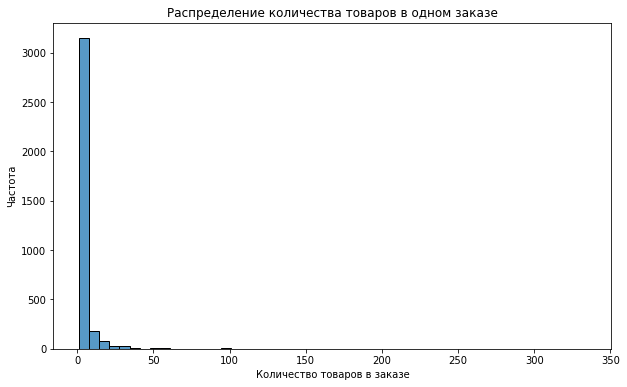

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df.groupby('order_id')['quantity'].sum(), bins=50)
plt.title('Распределение количества товаров в одном заказе')
plt.xlabel('Количество товаров в заказе')
plt.ylabel('Частота')
plt.show()


**В среднем в одном заказе содержится четыре товара,  медиане — один. Самые большие заказы по количеству — оптовые, в которых заказывается один товар в больших количествах.**

##### Количество заказов на одного покупателя

In [41]:
orders_customer = df.groupby('customer_id')['order_id'].nunique().reset_index().sort_values(by='order_id', ascending=False)
orders_customer.head(10)


,customer_id,order_id
1897,c971fb21-d54c-4134-938f-16b62ee86d3b,126
732,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
1088,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
1731,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
17,0184f535-b60a-4914-a982-231e3f615206,5
1802,bea7a833-2074-42db-bc49-4457abd3c930,4
2125,e0535076-6270-4df2-8621-cb06264a94fa,4
689,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4
1171,7d0641a6-e043-487d-b356-38895fe7df84,3
110,0adba506-249c-40b5-839d-a59d7a275cd7,3


In [42]:
orders_customer.describe()

,order_id
count,2429.000000
mean,1.442569
std,2.689233
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,126.000000


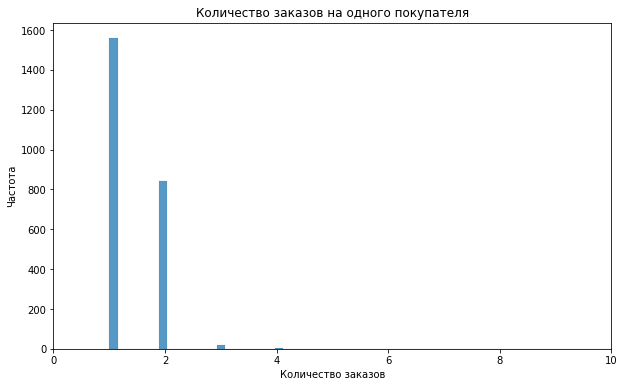

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df.groupby('customer_id')['order_id'].nunique())
plt.title('Количество заказов на одного покупателя')
plt.xlabel('Количество заказов')
plt.ylabel('Частота')
plt.xlim(0, 10)
plt.show()

**В среднем количество заказов на одного покупателя 1,4, медиана — 1. Максимальное количество — 126 заказов.**

##### Количество товаров на одного покупателя по заказам

In [44]:
quantity_customer = df.groupby('customer_id').agg(
    total_quantity=('quantity', 'sum'),  
    order_count=('order_id', 'nunique')     
).reset_index().sort_values(by='total_quantity', ascending=False)

quantity_customer.head(10)

,customer_id,total_quantity,order_count
1897,c971fb21-d54c-4134-938f-16b62ee86d3b,334,126
197,146cd9bf-a95c-4afb-915b-5f6684b17444,334,1
732,4d93d3f6-8b24-403b-a74b-f5173e40d7db,309,35
1934,cd09ea73-d9ce-48c3-b4c5-018113735e80,300,1
862,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,300,1
1569,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,200,1
1578,aa42dc38-780f-4b50-9a65-83b6fa64e766,170,1
974,685d3d84-aebb-485b-8e59-344b3df8b3d3,150,1
124,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,140,1
1346,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,101,1


In [45]:
quantity_customer.describe()

,total_quantity,order_count
count,2429.000000,2429.000000
mean,5.512557,1.442569
std,18.065149,2.689233
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,3.000000,2.000000
max,334.000000,126.000000


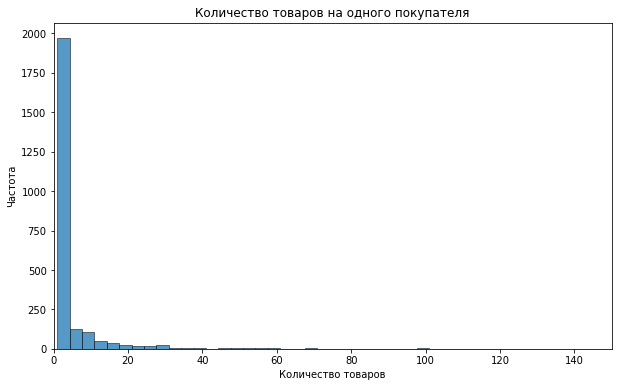

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df.groupby('customer_id')['quantity'].sum(), bins=100)
plt.title('Количество товаров на одного покупателя')
plt.xlabel('Количество товаров')
plt.ylabel('Частота')
plt.xlim(0, 150)
plt.show()

**Количество товаров на одного покупателя в среднем 5,5, медиана 2. Максимальное значение 334. В основном все самые крупные заказы по количеству товаров приходятся на один заказ, скорее всего, это оптовый покупатель.**

##### Выручка по заказам

In [47]:
revenue_order = df.groupby('order_id').agg(
    revenue =('total', 'sum'),  
    quantity_count=('quantity', 'count'),
    quantity_sum=('quantity', 'sum')
).reset_index().sort_values(by='revenue', ascending=False)

revenue_order.head(10)

,order_id,revenue,quantity_count,quantity_sum
1997,71668,49432.0,1,334
1062,69830,47385.0,1,27
722,69156,33680.0,6,101
915,69504,32718.0,1,57
569,68878,24370.0,1,5
502,68760,22056.0,21,47
1176,70080,16536.0,1,3
1780,71206,15680.0,1,10
3177,107812,15358.0,1,2
1901,71478,15300.0,1,300


In [48]:
df[df['order_id'] == 69156 ]

,date,customer_id,order_id,product,quantity,price,total,month
1022,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,Кухонные ножницы WEBBER из нержавеющей стали с орехоколом ВЕ-5208,2,127.0,254.0,2018-11-01
1023,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,Набор ножей Attribute CHEF 5 предметов AKF522,64,457.0,29248.0,2018-11-01
1024,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,"Нож кухонный для мяса с пластмассовой ручкой 305 х 175 мм, ""Русская Линия"" (НХ-36М), Метиз 1519003",6,127.0,762.0,2018-11-01
1025,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,"Нож кухонный для овощей с деревянной ручкой 318 х 200 мм, ""Гурман"" (НХ-14М), Метиз 1519009",3,142.0,426.0,2018-11-01
1026,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,"Нож кухонный универсальный с пластмассовой ручкой 285 х 150 мм, ""Русская Линия"" (НХ-38М) Метиз 1519022",24,119.0,2856.0,2018-11-01
1027,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,Рыбочистка с деревянной ручкой с ножом 1518024,2,67.0,134.0,2018-11-01


In [49]:
revenue_order.describe()

,order_id,revenue,quantity_count,quantity_sum
count,3504.000000,3504.000000,3504.000000,3504.000000
mean,73575.013128,1120.927916,1.585046,3.821347
std,23396.136836,2085.292256,2.531709,13.142385
min,12624.000000,9.000000,1.000000,1.000000
25%,69437.750000,189.500000,1.000000,1.000000
50%,71152.500000,578.500000,1.000000,1.000000
75%,72901.500000,1240.250000,1.000000,2.000000
max,112789.000000,49432.000000,51.000000,334.000000


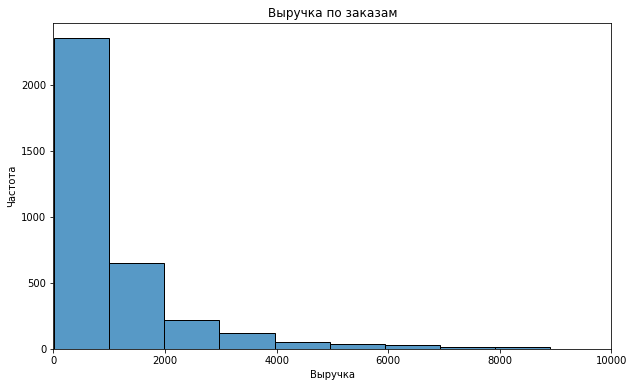

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df.groupby('order_id')['total'].sum(), bins=50)
plt.title('Выручка по заказам')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.xlim(0, 10000)
#plt.grid(linestyle='--', alpha=0.7)
plt.show()



**Количество уникальных заказов составило 3504. Средняя выручка от одного заказа достигла 1120 , а медиана — 578,5. Максимальный заказ был выполнен на сумму 49432, а минимальный — на 9. Заказ с максимальной выручкой относится к категории оптовых покупок.** 

##### По месяцам количество заказов, выручка, товары

In [51]:
monthly_data = df.groupby('month').agg(
    revenue =('total', 'sum'),  
    order_count=('order_id', 'nunique'),
    quantity_sum=('quantity', 'sum')
).reset_index()

display(monthly_data.style.background_gradient(cmap='Blues', axis=0))

,month,revenue,order_count,quantity_sum
0,2018-10-01 00:00:00,351536.000000,239,1558
1,2018-11-01 00:00:00,359348.000000,204,1242
2,2018-12-01 00:00:00,351580.000000,282,1010
3,2019-01-01 00:00:00,228888.000000,164,610
4,2019-02-01 00:00:00,305468.000000,287,944
5,2019-03-01 00:00:00,254320.000000,248,1074
6,2019-04-01 00:00:00,313707.000000,261,1446
7,2019-05-01 00:00:00,240309.000000,182,1548
8,2019-06-01 00:00:00,229365.000000,161,926
9,2019-07-01 00:00:00,235171.000000,198,560


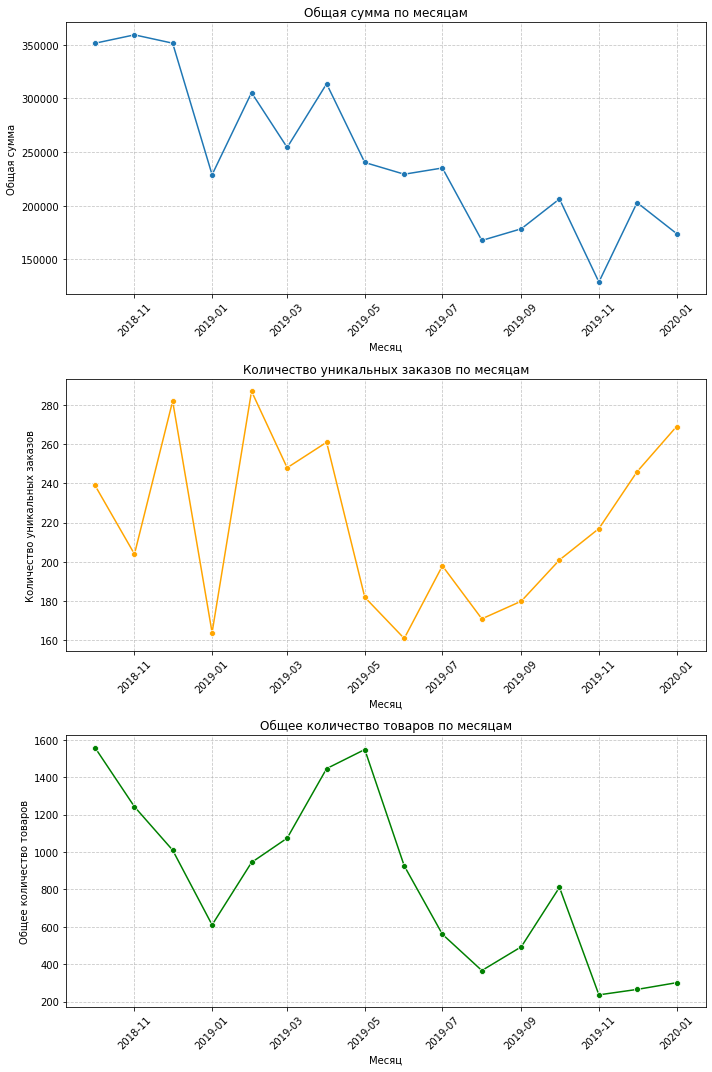

In [52]:
plt.figure(figsize=(10, 15))  

# Общая сумма 
plt.subplot(3, 1, 1)  
sns.lineplot(data=monthly_data, x='month', y='revenue', marker='o')
plt.title('Общая сумма по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Общая сумма')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)

# Количество уникальных заказов 
plt.subplot(3, 1, 2)  
sns.lineplot(data=monthly_data, x='month', y='order_count', marker='o', color='orange')
plt.title('Количество уникальных заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество уникальных заказов')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)

# Общее количество товаров 
plt.subplot(3, 1, 3)  
sns.lineplot(data=monthly_data, x='month', y='quantity_sum', marker='o', color='green')
plt.title('Общее количество товаров по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Общее количество товаров')
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()  
plt.show()




**С мая 2019 года общая выручка по месяцам резко сокращается, как и количество заказов. Однако с мая 2019 года наблюдается постепенный рост количества заказов. Максимальное количество товаров было куплено в мае 2019 года, после чего последовал резкий спад.**

##### Выручка по клиентам

In [53]:
revenue_customer = (df.groupby('customer_id')
                    .agg(revenue =('total', 'sum'),  
                         order_count=('order_id', 'nunique'),
                         quantity_sum=('quantity', 'sum'))
                    .assign(one_order=lambda x: (x['revenue'] / x['order_count'] ).round())
                    .sort_values(by='revenue', ascending=False)
                    .reset_index())

revenue_customer.head(10)


,customer_id,revenue,order_count,quantity_sum,one_order
0,c971fb21-d54c-4134-938f-16b62ee86d3b,159508.0,126,334,1266.0
1,4d93d3f6-8b24-403b-a74b-f5173e40d7db,57278.0,35,309,1637.0
2,58a4c3cc-504f-43ea-a74a-bae19e665552,53232.0,2,30,26616.0
3,146cd9bf-a95c-4afb-915b-5f6684b17444,49432.0,1,334,49432.0
4,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,41900.0,4,85,10475.0
5,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,33680.0,1,101,33680.0
6,6987e6d6-a63a-4ce2-a2d0-f424092d235e,32718.0,1,57,32718.0
7,1b2764ad-9151-4051-a46a-9b01b62e6335,24370.0,1,5,24370.0
8,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,22056.0,1,47,22056.0
9,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,21361.0,17,17,1257.0


In [54]:
revenue_customer.describe()

,revenue,order_count,quantity_sum,one_order
count,2429.000000,2429.000000,2429.000000,2429.000000
mean,1617.015816,1.442569,5.512557,1173.513792
std,4325.090103,2.689233,18.065149,2105.474250
min,15.000000,1.000000,1.000000,15.000000
25%,389.000000,1.000000,1.000000,300.000000
50%,832.000000,1.000000,2.000000,652.000000
75%,1797.000000,2.000000,3.000000,1349.000000
max,159508.000000,126.000000,334.000000,49432.000000


**Средняя выручка, приходящаяся на одного клиента, составляет 1617, а медиана — 832. Средний чек равен 1173, а его медиана — 652.
Наибольшая выручка наблюдается у клиентов с наибольшим количеством заказов. В топ-10 покупателей по выручке входят как оптовые, так и обычные клиенты.**

##### Какие товары приносят наибольшую выручку или продаются чаще всего

In [55]:
product_revenue = df.groupby('product').agg({'total': 'sum', 'quantity': 'sum'}).reset_index()

In [56]:
# Топ 10 товаров по выручке
product_revenue.nlargest(10, 'total')

,product,total,quantity
1193,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,53232.0,30
191,Вешалки мягкие для деликатных вещей 3 шт шоколад,49596.0,335
1617,Сумка-тележка 2-х колесная Gimi Argo синяя,48231.0,45
1898,Тележка багажная DELTA ТБР-22 синий грузоподъемность 20 кг сумка и 50 кг каркас РОССИЯ,33992.0,59
835,Муляж ЯБЛОКО 9 см красное,32702.0,618
874,Набор ножей Attribute CHEF 5 предметов AKF522,29248.0,64
1643,"Сумка-тележка хозяйственная Andersen Scala Shopper Plus, Lini, синяя 133-108-90",28045.0,5
1700,Сушилка Meliconi Stendy Junior,27970.0,5
841,Мусорный контейнер Hailo BigBin Swing 45 0845-010 45 л хром,27560.0,5
1949,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см, сталь",24370.0,5


In [57]:
# Топ 10 товаров по количеству
product_revenue.nlargest(10, 'quantity')

,product,total,quantity
835,Муляж ЯБЛОКО 9 см красное,32702.0,618
191,Вешалки мягкие для деликатных вещей 3 шт шоколад,49596.0,335
1452,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",5829.0,201
837,Муляж Яблоко зеленый 9 см полиуретан,10492.0,188
663,"Крепеж для пружины дверной, 1107055",3290.0,170
1113,Плечики пластмассовые Размер 52 - 54 Тула 1205158,3210.0,160
1198,"Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014",5700.0,150
777,Муляж Банан желтый 21 см полиуретан,5831.0,109
2239,"Щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 5,5 см 1801096",6810.0,105
7,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",5633.0,103


**Анализ данных с октября 2018 по январь 2020 года**

Средний объем товаров в одном заказе составляет четыре единицы, а медиана — один. Однако самые крупные заказы по количеству товаров обычно включают в себя оптовые партии, где один товар приобретается в больших объемах.

В среднем на одного покупателя приходится 1,4 заказа, а медиана составляет 1. Максимальное количество заказов, зафиксированное за этот период, достигает 126.

Среднее количество товаров, приобретаемых одним покупателем, составляет 5,5 единицы, а медиана — 2. Максимальное количество товаров, зафиксированное в одном заказе, достигает 334. Большинство самых крупных заказов по количеству товаров приходится на один и тот же заказ, что свидетельствует о вероятной оптовой деятельности покупателей.

Количество уникальных заказов в указанный период составило 3504. Средняя выручка от одного заказа достигла 1120 рублей, а медиана — 578,5. Максимальный заказ был выполнен на сумму 49432 рубля, в то время как минимальный заказ составил всего 9 рублей. Заказ с максимальной выручкой относится к категории оптовых покупок.

С мая 2019 года общая выручка по месяцам демонстрирует резкое снижение, как и количество заказов. Однако с мая 2019 года наблюдается постепенный рост количества заказов. Максимальное количество товаров было куплено в мае 2019 года, после чего последовал резкий спад.

Средняя выручка, приходящаяся на одного клиента, составляет 1617 рублей, а медиана — 832 рубля. Средний чек равен 1173 рублям, а его медиана — 652 рубля. Наибольшая выручка наблюдается у клиентов с наибольшим количеством заказов. В топ-10 покупателей по выручке входят как оптовые, так и обычные клиенты.

In [58]:
# список customer_id, которые нужно исключить
ids = ['c971fb21-d54c-4134-938f-16b62ee86d3b', 
       '4d93d3f6-8b24-403b-a74b-f5173e40d7db', 
       '73d1cd35-5e5f-4629-8cf2-3fda829d4e58']

df = df[~df['customer_id'].isin(ids)]

In [59]:
df.groupby('customer_id')['order_id'].nunique().reset_index().sort_values(by='order_id', ascending=False)

,customer_id,order_id
1729,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
17,0184f535-b60a-4914-a982-231e3f615206,5
2122,e0535076-6270-4df2-8621-cb06264a94fa,4
1800,bea7a833-2074-42db-bc49-4457abd3c930,4
689,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4
...,...,...
980,6987e6d6-a63a-4ce2-a2d0-f424092d235e,1
979,695cbeda-4295-4b5e-9db9-6ac0adc5f1d7,1
978,6952bdf7-5b29-4fb4-90a4-a7a325825aed,1
976,68fdcaa9-ff3f-486f-8eb7-a6ac6d2c0a61,1


#### Сегментация покупателей (методом K-Means )  

In [60]:
customer_summary = (df.groupby('customer_id')
                    .agg( quantity_mean=('quantity', 'mean'),  # Среднее количество товара
                          # average_order  =('total', 'mean'),  # Средний чек
                          price_mean=('price', 'mean'),        # Средняя цена товара
                          order_count=('order_id', 'nunique'), # Частота покупок
                         total=('total', 'sum'))               # Сумма всех покупок
                    .assign(average_order=lambda x: (x['total'] / x['order_count']).round())  # Средний чек
                    .reset_index())


customer_summary.head()


,customer_id,quantity_mean,price_mean,order_count,total,average_order
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1.0,138.75,1,555.0,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,1.0,442.00,1,442.0,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,2.0,457.00,1,914.0,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1.0,1649.00,1,1649.0,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2.0,1162.00,1,2324.0,2324.0


In [61]:
# столбцы для кластеризации
X = customer_summary[['average_order', 'quantity_mean', 'price_mean', 'order_count']]

# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


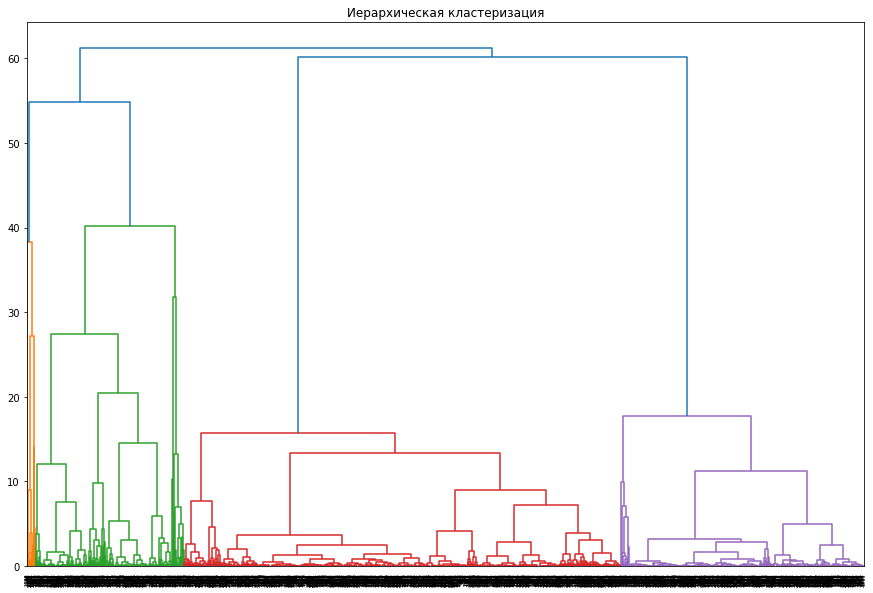

In [62]:
linked = linkage(X_scaled, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 

Разделим данные на 4 кластера.

In [63]:
# Определение количества кластеров
k = 4

# Создание и обучение модели KMeans
kmeans = KMeans(n_clusters=k, random_state=0)
customer_summary['cluster'] = kmeans.fit_predict(X_scaled)


customer_summary.head()

,customer_id,quantity_mean,price_mean,order_count,total,average_order,cluster
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1.0,138.75,1,555.0,555.0,0
1,001cee7f-0b29-4716-b202-0042213ab038,1.0,442.00,1,442.0,442.0,0
2,00299f34-5385-4d13-9aea-c80b81658e1b,2.0,457.00,1,914.0,914.0,0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1.0,1649.00,1,1649.0,1649.0,0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2.0,1162.00,1,2324.0,2324.0,0


In [64]:
customer_summary['cluster'].value_counts(normalize=True)

0    0.588623
2    0.336356
1    0.069250
3    0.005771
Name: cluster, dtype: float64

In [65]:
#customer_summary[customer_summary['cluster'] == 3]

In [66]:
#customer_summary[customer_summary['cluster'] == 1].sort_values(by='quantity_mean', ascending=False).tail(10)

In [67]:
customer_summary.groupby('cluster').mean()

,quantity_mean,price_mean,order_count,total,average_order
cluster,,,,,
0,3.429935,430.598652,1.000000,910.720938,910.720588
1,1.783163,3549.949688,1.315476,6002.622024,4671.660714
2,1.324444,633.121242,2.037990,1469.701491,710.292892
3,143.845238,92.476190,1.000000,12954.142857,12954.142857


**Данные были разделены на 4 сегмента: нулевой, первый ,второй и третий. В нулевой сегмент вошли 59% всех пользователей, в первый — 7%, второй — 33%, третий оставшиеся 1% пользователей.**

#### Группировка товаров по категориям (создание категорий на основе характеристик товаров)  


In [68]:
# Объединяем все наименования в один текст
all_products = ' '.join(df['product'].astype(str))

# Приводим текст к нижнему регистру и удаляем лишние символы
all_products = all_products.lower()
all_products = re.sub(r'[^\w\s]', '', all_products)

# Разделяем текст на слова
words = all_products.split()

# Подсчитываем частоту слов
word_counts = Counter(words)

word_counts.most_common(50)

[('см', 2373),
 ('для', 1091),
 ('пеларгония', 839),
 ('рассада', 672),
 ('в', 619),
 ('л', 562),
 ('зональная', 489),
 ('диам', 485),
 ('с', 443),
 ('шт', 424),
 ('сорт', 420),
 ('12', 362),
 ('укорененный', 344),
 ('черенок', 344),
 ('объем', 339),
 ('махровая', 335),
 ('белья', 320),
 ('по', 290),
 ('сушилка', 277),
 ('кассете', 266),
 ('05', 261),
 ('розебудная', 253),
 ('d12', 245),
 ('кухни', 242),
 ('сумкатележка', 242),
 ('зелени', 236),
 ('gimi', 224),
 ('горшке', 202),
 ('6', 202),
 ('томата', 194),
 ('помидор', 194),
 ('9', 191),
 ('петуния', 187),
 ('белая', 186),
 ('муляж', 185),
 ('кассета', 181),
 ('россия', 179),
 ('и', 171),
 ('цветов', 170),
 ('ника', 165),
 ('кг', 165),
 ('4', 158),
 ('м', 153),
 ('10', 146),
 ('хозяйственная', 145),
 ('d7', 142),
 ('однолетних', 142),
 ('среднеспелый', 141),
 ('доска', 136),
 ('синяя', 135)]

In [69]:
word_counts

Counter({'комнатное': 16,
         'растение': 99,
         'в': 619,
         'горшке': 202,
         'алое': 4,
         'вера': 8,
         'd12': 245,
         'h30': 18,
         'кофе': 12,
         'арабика': 11,
         'h25': 20,
         'радермахера': 1,
         'см': 2373,
         'h20': 36,
         'хризолидокарпус': 2,
         'лутесценс': 2,
         'd9': 68,
         'циперус': 9,
         'зумула': 9,
         'шеффлера': 4,
         'лузеана': 2,
         'юкка': 1,
         'нитчатая': 1,
         'h2535': 3,
         'настенная': 44,
         'сушилка': 277,
         'для': 1091,
         'белья': 320,
         'gimi': 224,
         'brio': 6,
         'super': 9,
         '100': 68,
         'таз': 67,
         'пластмассовый': 83,
         '210': 14,
         'л': 562,
         'круглый': 15,
         'водолей': 1,
         'с614': 1,
         '1404056': 1,
         'вешалка': 42,
         'брюк': 4,
         'металлическая': 17,
         'с': 443,
         

In [70]:
# Словарь категорий
categories = {
    'растения и рассада': ['растение', 'пеларгония', 'помидор', 'герань', 'петуния', 'горшке', 'бакопа',
                 'кассете', 'калибрахоа', 'базилик', 'петрушка', 'томат', 'календула','ясколка', 'лапчатка',
                 'лобелия', 'фуксия', 'вербена', 'цветк', 'смесь', "микс", 'земляника','платикодон','энотера',
                 'клубника', 'ель', 'упаков', 'укроп', 'd-', 'камнеломка', 'примула','кореопсис','анемона', 'алиссум',
                 'вербейник', 'колокольчик', 'цикламен', 'барвинок', 'дыня', 'овсянница', 'пиретрум', 'пиретрум',
                 'папоротник', 'кипарис', 'бегония', 'осина', 'арбуз','тюльпан','настурция','космея','рассада', 'г',
                          'бадан','анемона','седум','черенок'],
    
    
    'товары для дома': ['покрытие', 'перчат', 'почтов', 'чехол', 'ковр', 'ткан', 'штор', 'ковер','декоративная',
                        'термометр', 'ковёр', 'светил', 'весы', 'одеял', 'простын', 'подуш','ключница', 
                        'плед', 'матрас', 'мыло', 'покрывало', 'спальн', 'наволочка','плед','кашпо', 
                        'тряп', 'швабр', 'совок', 'гладил', 'глажен', 'прищеп', 'налет', 
                        'антижир', 'пылесос', 'крем', 'стир', 'щетка', 'сушилк', 'веник', 
                        'подрукавник', 'совком', 'для чистки', 'стирки', 'мыть', 'средство',
                        'мойк', 'полки', 'вешал', 'плечики', 'стеллаж', 'хранен', 'крючок', 
                        'этажерка', 'комод', 'подставка', 'полка', 'кофр', 'лоток', 'ванн', 
                        'полотен', 'ёрш', 'ерш', 'зуб', 'вантуз', 'халат', 'корыт', 'таз', 
                        'контейнер', 'бак', 'мусор', 'ведр', 'урна', 'корзин', 'бидон','пуф','ваза', 
                        'ковш', 'коробка','фен дорожный','сменный блок','решетка','скребок','маска','насадка-моп','пробки'],
    
    'товары для кухни': ['блюдо', 'сковород', 'вилка', 'тарелк', 'ложка', 'фужер', 'посуд','котовник', 
                         'кувшин', 'противень', 'соковыжим', 'лопатка', 'стакан', 'салатн','кувшин', 
                         'нож', 'бокал', 'чай', 'столов', 'банка', 'круж', 'толкушка','электроштопор',
                         'терка', 'варка', 'масл', 'чистка', 'салфет', 'кастрюл', 'webber', 
                         'сахар', 'котел', 'wilmax', 'половник', 'скатерть', 'кипят','венчик',
                         'дозатор', 'зажиг', 'губка спираль', 'миска', 'термос', 'хлебница','скалка','тортница', 
                         'кухон', 'кухн', 'бульон', 'выпеч', 'пресс', 'блюд', 'емкость','орехоколка','разделочная'],
    
    'инструменты': ['инструмент', 'сверел', 'сверло', 'напильник', 'стремянк', 'стяжк', 
                    'шпингалет', 'сварка', 'миксер', 'крепеж', 'пружин', 'петл', 'линейк', 
                    'гои','шило','ручка-скоба','фал капроновый','фиксатор-шар','шнур'],
    
    'сумки хозяйственные ': ['сумка', 'тележ'],
    
    'искусственные растения и фрукты': ['муляж', 'искусственн']
}

# Функция для классификации товара
def categorize_product(product_name):
    product_name = product_name.lower()  # Приводим к нижнему регистру
    for category, keywords in categories.items():
        if any(keyword in product_name for keyword in keywords):
            return category
    return 'прочее'  # Если не найдено ни одно ключевое слово


df['category'] = df['product'].apply(categorize_product)

In [71]:
df[df['category'] == 'Прочее']

,date,customer_id,order_id,product,quantity,price,total,month,category


In [72]:
df['category'].value_counts(normalize=True).round(2)

растения и рассада                 0.73
товары для дома                    0.13
товары для кухни                   0.06
сумки хозяйственные                0.04
искусственные растения и фрукты    0.03
инструменты                        0.01
Name: category, dtype: float64

**Товары были разделены на 6 категорий. Самая большая категория — растения и рассада, она составляет 73% от общего количества товаров. Далее следуют: товары для дома — 13%, товары для кухни — 6%, хозяйственные сумки — 4%, искусственные растения и фрукты — 3%, инструменты — 1%.**

#### Исследование получившихся сегментов

In [73]:
# Объединяем в один датафрейм
df_cluster = df.merge(customer_summary[['customer_id', 'cluster']], on='customer_id', how='left')

# Заменяем значения в столбце cluster
df_cluster['cluster'] = df_cluster['cluster'].replace({0: 'Основные покупатели', 1: 'Покупатели с высокой ценой', 2: 'Экономные покупатели',3: 'Оптовые покупатели'})


In [74]:
df_cluster.head()

,date,customer_id,order_id,product,quantity,price,total,month,category,cluster
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10-01,растения и рассада,Основные покупатели
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,2018-10-01,растения и рассада,Основные покупатели
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10-01,растения и рассада,Основные покупатели
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10-01,растения и рассада,Основные покупатели
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10-01,растения и рассада,Основные покупатели


In [75]:
#df_cluster[df_cluster['cluster'] == 1]

In [76]:
grouped_data = (df_cluster.groupby(['month', 'cluster'])
                .agg(quantity_mean=('quantity', 'mean'),  # Среднее количество товара
                    price_mean=('price', 'mean'),        # Средняя цена товара
                    order_count=('order_id', 'nunique'), # Частота покупок
                    total=('total', 'sum'))               # Сумма всех покупок
                .assign(average_order=lambda x: (x['total'] / x['order_count']).round())  # Средний чек
                .reset_index())

#grouped_data

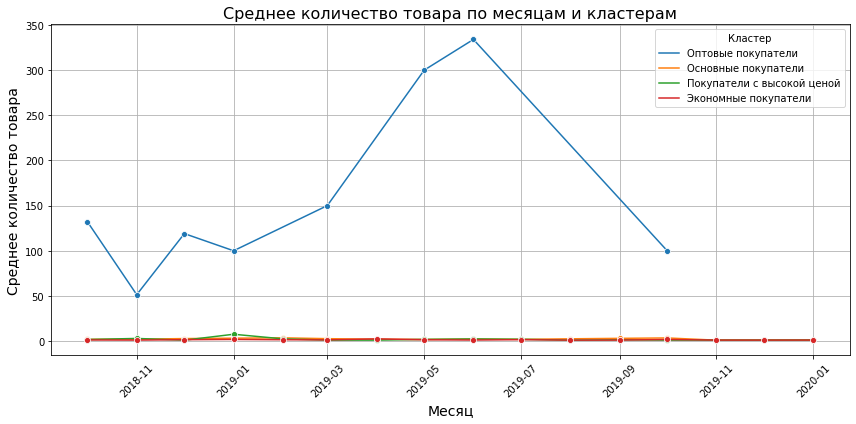

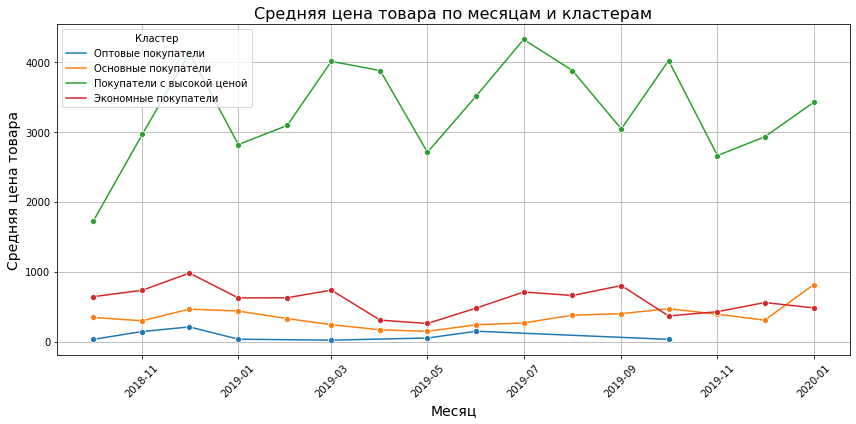

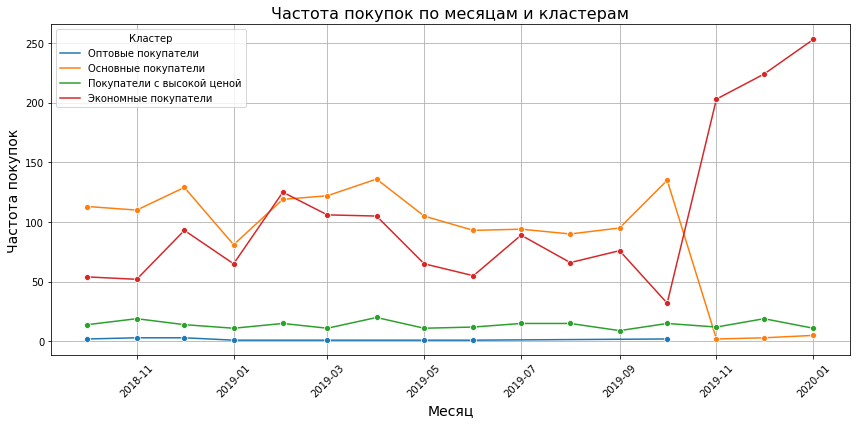

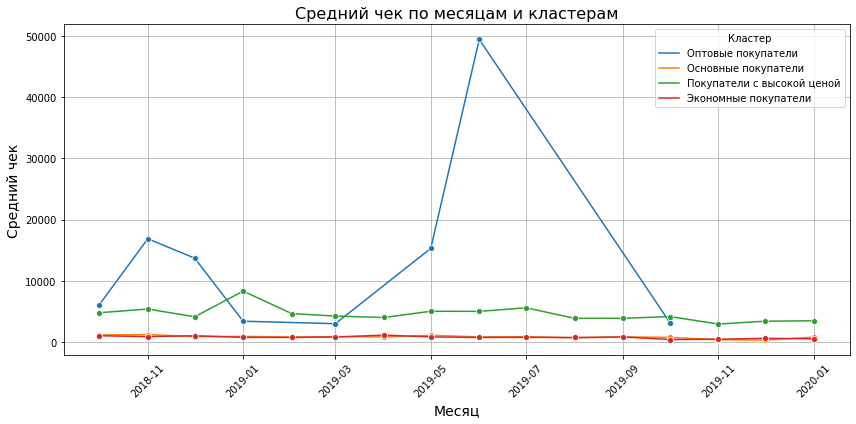

In [77]:
# Список метрик для визуализации
metrics = ['quantity_mean', 'price_mean', 'order_count', 'average_order']

# Словарь для заголовков и меток оси Y
labels = {
    'quantity_mean': 'Среднее количество товара',
    'price_mean': 'Средняя цена товара',
    'order_count': 'Частота покупок',
    'average_order': 'Средний чек'
}

for metric in metrics:
    plt.figure(figsize=(12, 6))
    
    sns.lineplot(data=grouped_data, x='month', y=metric, hue='cluster', marker='o')
        
    plt.title(f'{labels[metric]} по месяцам и кластерам', fontsize=16)
    plt.xlabel('Месяц', fontsize=14)
    plt.ylabel(labels[metric], fontsize=14) 
    plt.xticks(rotation=45)
    plt.legend(title='Кластер')
    plt.grid(True)
    plt.tight_layout()  
    plt.show()
   

Изменение количества уникальных покупателей по месяцам и сегментам

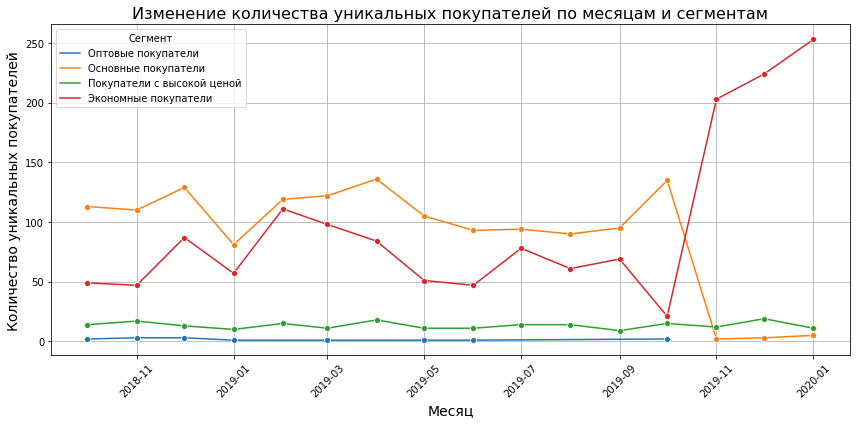

In [78]:
unique_customers = (df_cluster.groupby(['month', 'cluster'])
                    .agg(unique_customers=('customer_id', 'nunique'))  
                    .reset_index())

plt.figure(figsize=(12, 6))
sns.lineplot(data=unique_customers, x='month', y='unique_customers', hue='cluster', marker='o')

plt.title('Изменение количества уникальных покупателей по месяцам и сегментам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество уникальных покупателей', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Сегмент')
plt.grid(True)
plt.tight_layout()  
plt.show()



Влияние частоты покупок на выручку по сегментам

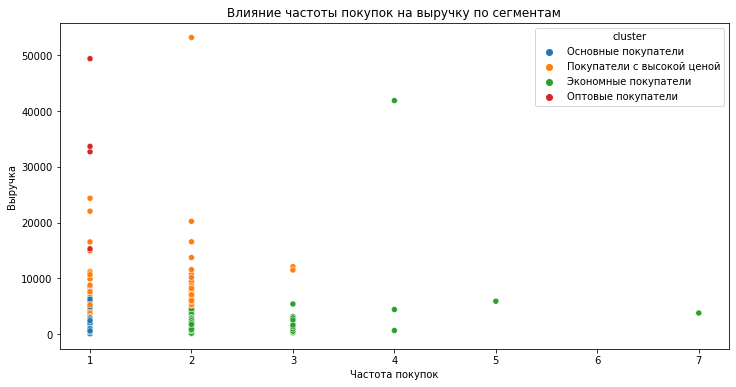

In [79]:
cluster_revenue = df_cluster.groupby(['customer_id', 'cluster']).agg(
    order_count=('order_id', 'nunique'),  # Количество покупок
    total_revenue=('total', 'sum')         # Общая выручка
).reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=cluster_revenue, x='order_count', y='total_revenue', hue='cluster')
plt.title('Влияние частоты покупок на выручку по сегментам')
plt.xlabel('Частота покупок')
plt.ylabel('Выручка')
plt.show()

In [80]:
customer_summary[customer_summary['cluster'] == 0]

,customer_id,quantity_mean,price_mean,order_count,total,average_order,cluster
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1.0,138.75,1,555.0,555.0,0
1,001cee7f-0b29-4716-b202-0042213ab038,1.0,442.00,1,442.0,442.0,0
2,00299f34-5385-4d13-9aea-c80b81658e1b,2.0,457.00,1,914.0,914.0,0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1.0,1649.00,1,1649.0,1649.0,0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2.0,1162.00,1,2324.0,2324.0,0
...,...,...,...,...,...,...,...
2418,ff0c73c3-6b62-4e67-8e12-bb83ed1851d5,1.0,899.00,1,899.0,899.0,0
2422,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1.0,397.00,1,397.0,397.0,0
2423,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1.0,389.00,1,389.0,389.0,0
2424,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1.0,974.00,1,974.0,974.0,0


In [81]:
customer_summary
customer_summary[customer_summary['cluster'] == 1].describe()

,quantity_mean,price_mean,order_count,total,average_order,cluster
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.0
mean,1.783163,3549.949688,1.315476,6002.622024,4671.660714,1.0
std,4.033123,1737.455003,0.491117,5134.254120,3505.910095,0.0
min,1.000000,246.500000,1.000000,2219.000000,2219.000000,1.0
25%,1.000000,2614.625000,1.000000,3241.250000,2816.000000,1.0
50%,1.000000,3110.750000,1.000000,5098.000000,3628.500000,1.0
75%,1.000000,4050.125000,2.000000,7078.750000,5092.000000,1.0
max,45.000000,14917.000000,3.000000,53232.000000,26616.000000,1.0


In [82]:
df_cluster[df_cluster['cluster'] == 'Покупатели с высокой ценой'].describe()

,order_id,quantity,price,total
count,257.000000,257.000000,257.000000,257.000000
mean,75225.311284,1.879377,3177.698444,3923.892996
std,16505.702401,3.964324,2313.893826,4024.053763
min,14735.000000,1.000000,30.000000,30.000000
25%,69135.000000,1.000000,1424.000000,2234.000000
50%,71074.000000,1.000000,2849.000000,3156.000000
75%,72549.000000,1.000000,4859.000000,5287.000000
max,112767.000000,45.000000,14917.000000,47385.000000


In [83]:
customer_summary.groupby('cluster').mean()

,quantity_mean,price_mean,order_count,total,average_order
cluster,,,,,
0,3.429935,430.598652,1.000000,910.720938,910.720588
1,1.783163,3549.949688,1.315476,6002.622024,4671.660714
2,1.324444,633.121242,2.037990,1469.701491,710.292892
3,143.845238,92.476190,1.000000,12954.142857,12954.142857


**Cегмент 0: "Основные покупатели:" 59% всех пользователей**
Описание: Этот сегмент характеризуется средним количеством товаров на заказ (3.43) и средней ценой заказа (430.60 рублей). У них всего один заказ, что может указывать на то, что они делают покупки нечасто. Средний чек составляет 910.72 рублей, что также говорит о том, что они не являются основными покупателями, но могут быть заинтересованы в определенных продуктах.

**Cегмент 1: "Покупатели с высокой ценой" 7% пользователей**
Описание: Этот сегмент выделяется высоким средним чеком (4671.66 рублей) и значительной средней выручкой (6002.62 рублей). Среднее количество заказов составляет 1.32, что указывает на то, что клиенты в этом сегменте делают более дорогие покупки, но не так часто. 

**Cегмент 2: "Экономные покупатели" 33% пользователей**
Описание: Этот сегмент характеризуется средним количеством товаров в заказе (1,32) и  средней ценой (633,12 рублей). Средний чек составляет 710 рублей, а среднее количество заказов — 2. Это указывает на то, что клиенты в этом сегменте совершают небольшие, но более частые покупки. 

**Cегмент 3: "Оптовые покупатели" 1% пользователей**
Описание: Этот сегмент выделяется очень высоким средним количеством товаров (143.85) и низкой средней ценой (92.48 рублей). Средний чек 12954.14 рублей, что говорит о том это может быть группа клиентов, которые покупают товары оптом или в больших количествах. 

#### Исследование наиболее популярных категорий товаров среди разных сегментов потребителей и их сезонности

Категории товаров, наиболее популярны среди различных сегментов

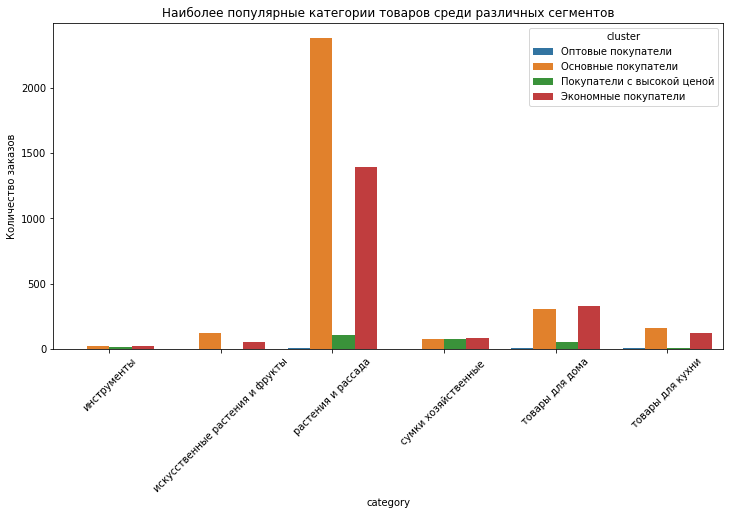

In [84]:
category_popularity = df_cluster.groupby(['category', 'cluster']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=category_popularity, x='category', y='count', hue='cluster')
plt.title('Наиболее популярные категории товаров среди различных сегментов')
plt.xticks(rotation=45)
plt.ylabel('Количество заказов')
plt.show()

In [85]:
grouped_data = (df_cluster.groupby(['month', 'cluster', 'category'])
                .agg(price_mean=('price', 'mean'),        # Средняя цена товара
                    unique_orders=('order_id', 'nunique'), # Частота покупок
                    revenue=('total', 'sum'))               # Выручка
                .assign(average_check=lambda x: (x['revenue'] / x['unique_orders']).round())  # Средний чек
                .reset_index())

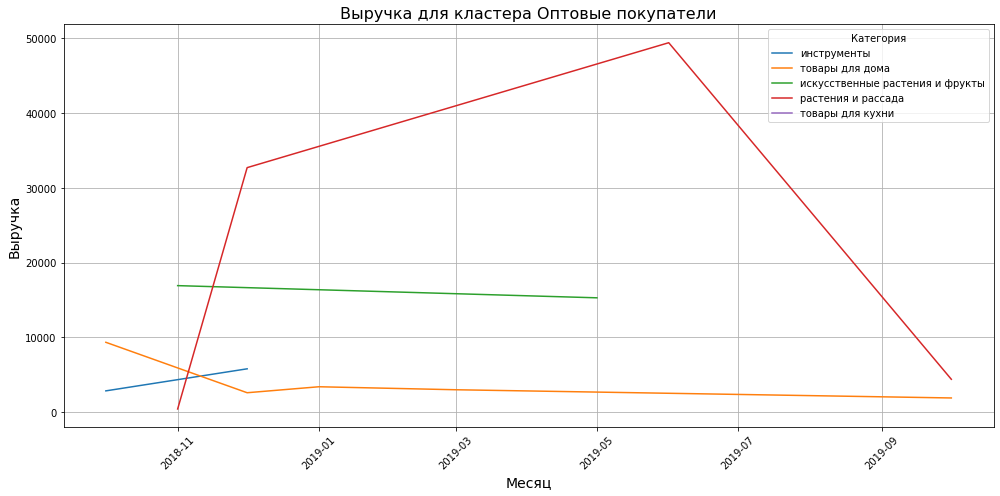

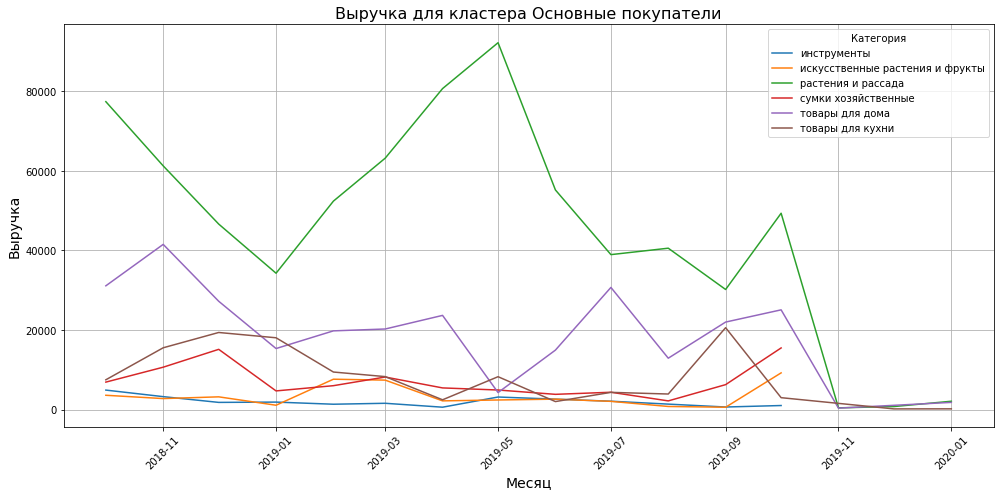

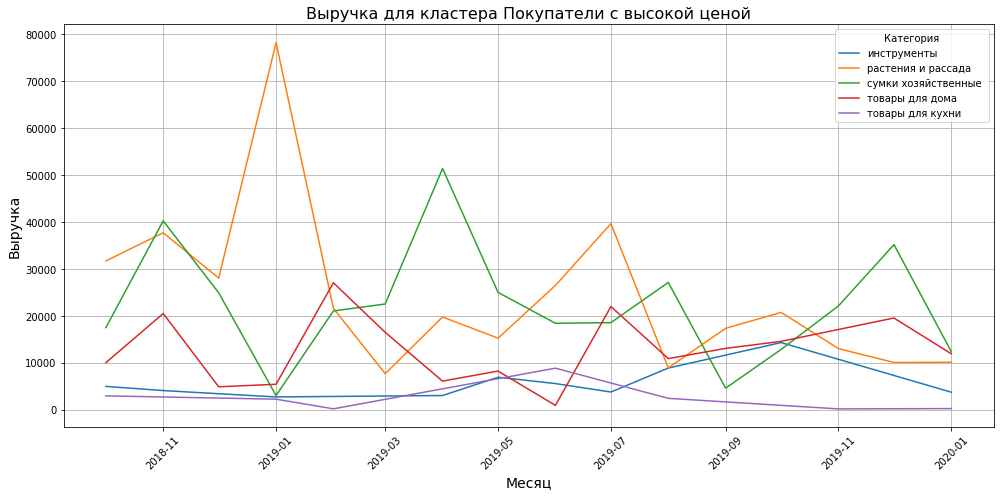

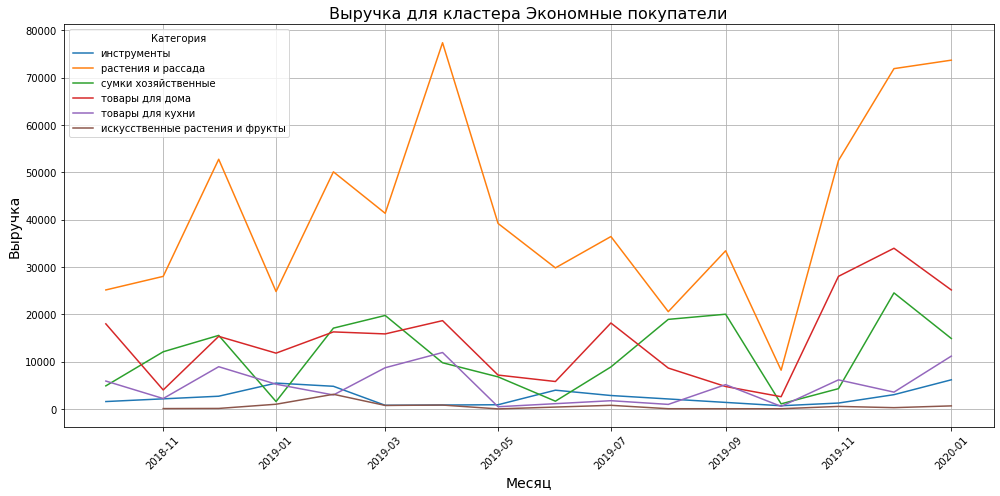

In [86]:
# Получаем уникальные кластеры
clusters = grouped_data['cluster'].unique()


for cluster in clusters:
    cluster_data = grouped_data[grouped_data['cluster'] == cluster]
    
    # График для выручки
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=cluster_data, x='month', y='revenue', hue='category', markers=True, dashes=False)
    plt.title(f'Выручка для кластера {cluster}', fontsize=16)
    plt.xlabel('Месяц', fontsize=14)
    plt.ylabel('Выручка', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Категория')
    plt.grid(True)
    plt.tight_layout()  
    plt.show()

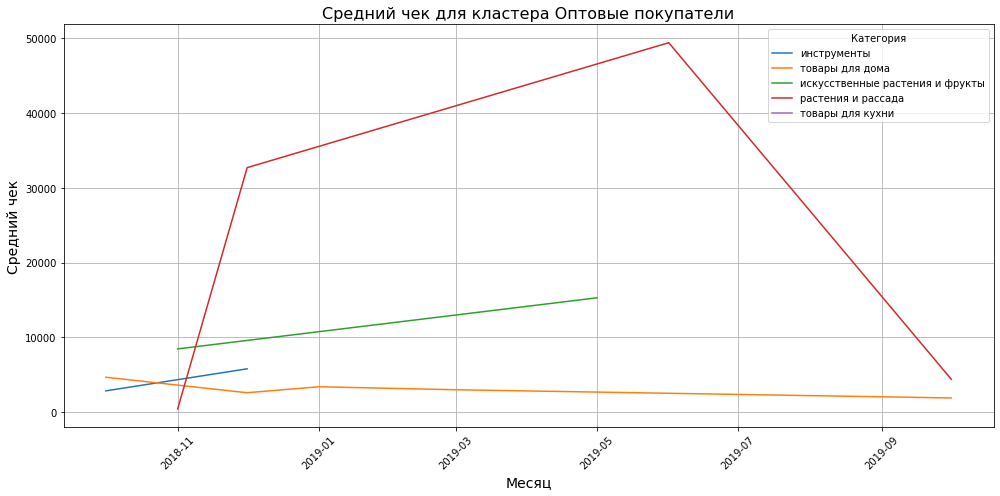

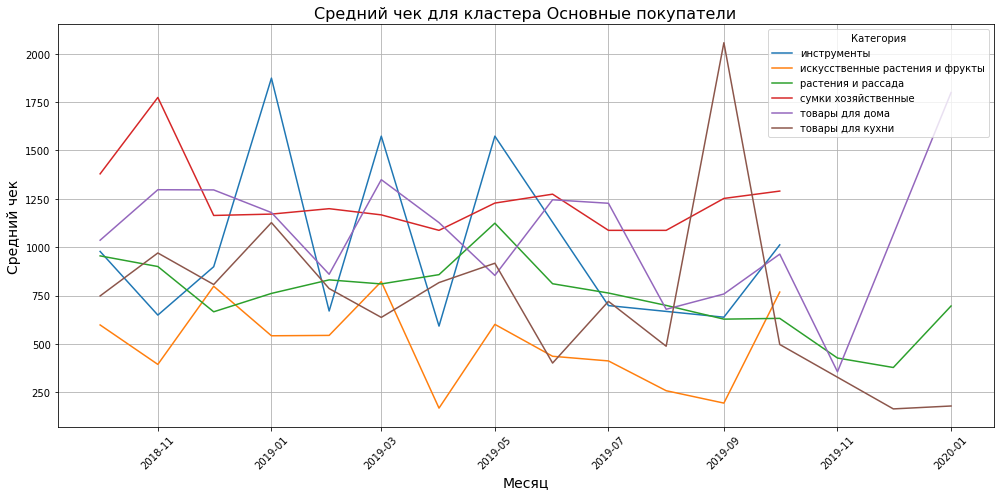

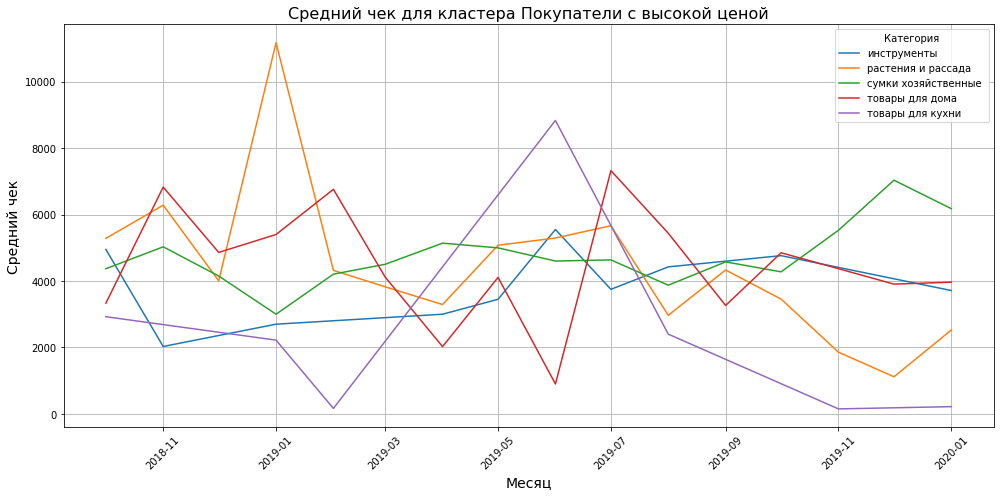

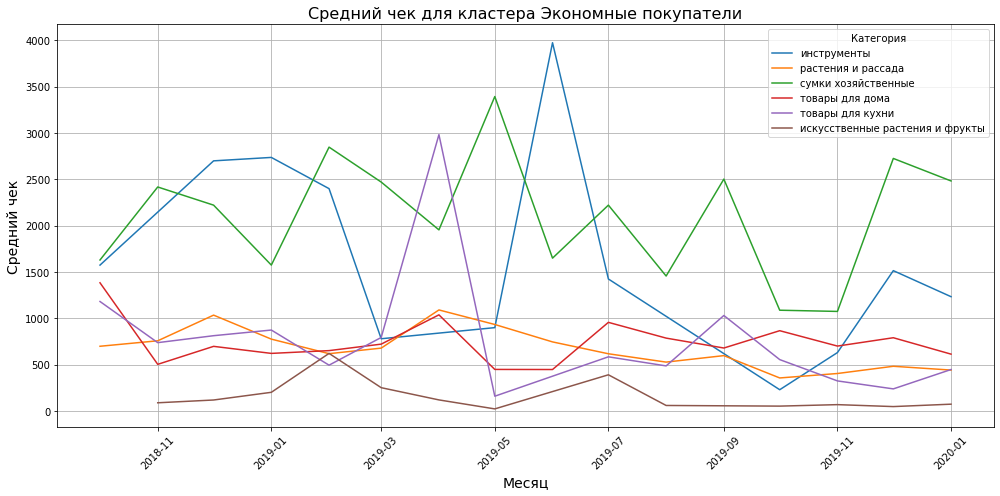

In [87]:
for cluster in clusters:
    cluster_data = grouped_data[grouped_data['cluster'] == cluster]
    
    
    # График для среднего чека
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=cluster_data, x='month', y='average_check', hue='category', markers=True, dashes=False)
    plt.title(f'Средний чек для кластера {cluster}', fontsize=16)
    plt.xlabel('Месяц', fontsize=14)
    plt.ylabel('Средний чек', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Категория')
    plt.grid(True)
    plt.tight_layout()  
    plt.show()

    

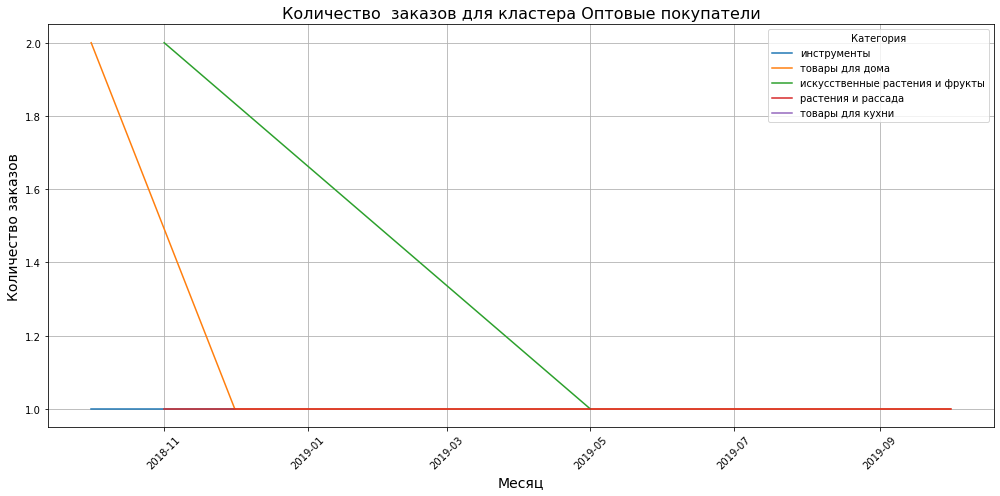

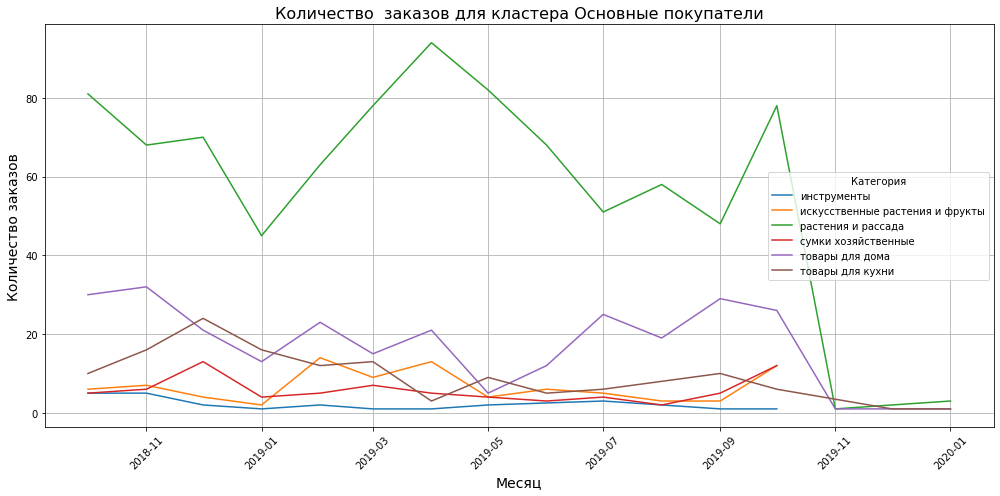

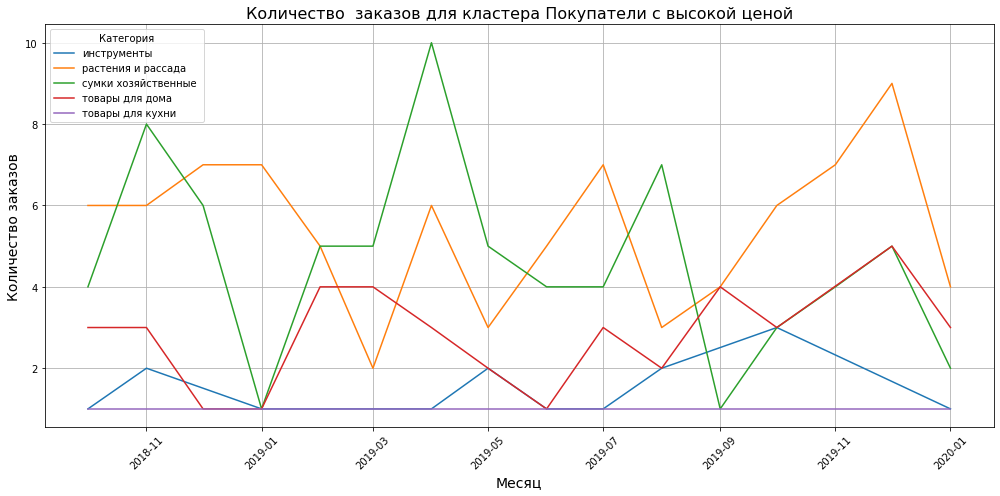

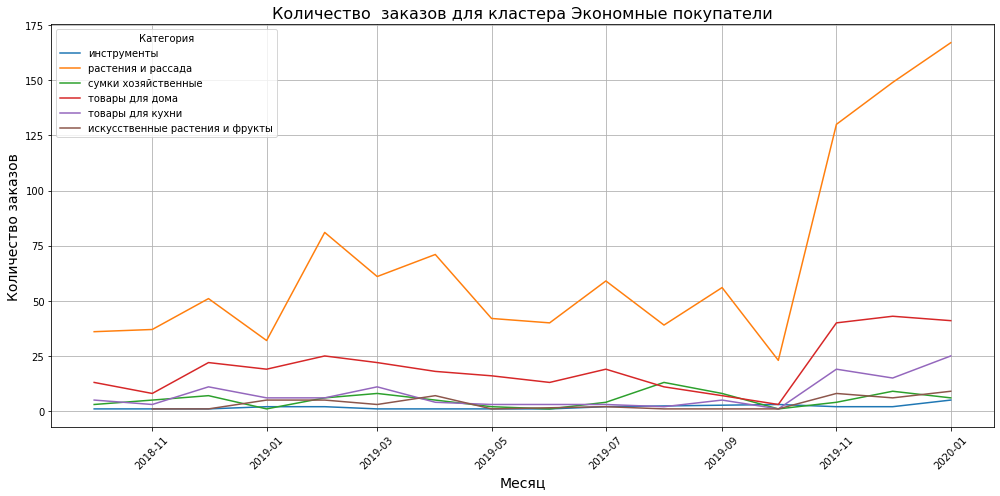

In [88]:
for cluster in clusters:
    cluster_data = grouped_data[grouped_data['cluster'] == cluster]
    
    
    # График для количества уникальных заказов
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=cluster_data, x='month', y='unique_orders', hue='category', markers=True, dashes=False)
    plt.title(f'Количество  заказов для кластера {cluster}', fontsize=16)
    plt.xlabel('Месяц', fontsize=14)
    plt.ylabel('Количество заказов', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Категория')
    plt.grid(True)
    plt.tight_layout()  
    plt.show()


**Cегмент 0: "Основные покупатели:" 59% всех пользователей**  

В категории растений и рассады наблюдается наибольшее количество заказов. Пик приходится на апрель, затем следует спад, который сменяется небольшим ростом в октябре.
Товары для дома пользуются спросом в феврале, апреле и с июля по октябрь. Товары для кухни также пользуются популярностью в течение всего года.
В категориях хозяйственные сумки, искусственные растения и фрукты, инструменты были стабильные заказы, но с октября они прекратились.
Инструменты отличаются высоким средним чеком, с пиками покупок в январе, марте и апреле. Также в тройку лидеров по среднему чеку входят хозяйственные сумки и товары для дома.
Товары для дома имеют пики продаж в марте, июне, июле и январе.
 
**Cегмент 1: "Покупатели с высокой ценой" 7% пользователей**

В период с января по декабрь мы наблюдаем увеличение количества заказов на растения и рассаду.
Среди товаров для дома наибольший спрос приходится на февраль, март, сентябрь и декабрь. Пик по среднему чеку наблюдается в феврале и июле.
Что касается товаров для кухни, то здесь мы видим рост среднего чека в июне, а затем его резкое падение.
Сумочки хозяйственные становятся все более популярными в ноябре, августе и апреле. В этой категории продажи с хорошим средним чеком выросли в декабре.
Также стоит отметить спрос на искусственные растения и фрукты, а также на инструменты.

**Cегмент 2: "Экономные покупатели" 33% пользователей**

В категории растений и рассады и товаров для дома наблюдается наибольший объем заказов.
Пик активности по заказам растений и рассады приходится на январь и ноябрь, в то время как количество заказов товаров для дома значительно возрастает в ноябре.
Среди хозяйственных сумок наблюдается самый высокий средний чек в феврале, мае, сентябре и декабре. Инструменты также демонстрируют высокие показатели среднего чека, особенно в июне и январе. 

**Cегмент 3: "Оптовые покупатели" 1% пользователей**

В категории растений и рассады средний чек был высоким с декабря 2018 по июнь 2019 года, а затем резко упал.
Товары для дома покупали на протяжении всего периода, и спрос оставался стабильным.
Искусственные растения и фрукты пользовались популярностью с ноября 2018 по май 2019 года.
Инструменты покупали только в ноябре 2018 года.


### Проверка гипотез

In [89]:
data = (df_cluster.groupby(['customer_id'])
                .agg(order_count=('order_id', 'nunique'),  # Частота покупок
                     total=('total', 'sum'),  # Сумма всех покупок
                     cluster=('cluster', 'first'))  # Получаем первый кластер для пользователя
                .assign(average_order=lambda x: (x['total'] / x['order_count']).round())  # Средний чек
                .reset_index())


Различие среднего чека между кластерами:

H0: Нет различий в среднем чеке между кластерами.  
H1: Есть различия в среднем чеке между кластерами.


In [90]:
clusters = data['cluster'].unique()
average_orders = {cluster: data[data['cluster'] == cluster]['average_order'] for cluster in clusters}

normality_results = {}
for cluster, orders in average_orders.items():
    stat, p_value = stats.shapiro(orders)
    normality_results[cluster] = p_value


for cluster, p in normality_results.items():
    print(f'Кластер: {cluster}, p-value: {p}')



Кластер: Основные покупатели, p-value: 6.997664141298839e-41
Кластер: Покупатели с высокой ценой, p-value: 6.04202252341539e-20
Кластер: Экономные покупатели, p-value: 4.822050936983281e-34
Кластер: Оптовые покупатели, p-value: 0.0008441100362688303


Если p-value меньше 0.05, это указывает на то, что распределение не нормально, и следует использовать непараметрический тест, например, тест Краскала-Уоллиса

In [91]:
# Выбор теста
if all(p > 0.05 for p in normality_results.values()):
    # ANOVA
    f_statistic, p_value = stats.f_oneway(*average_orders.values())
    print(f'ANOVA: F-statistic = {f_statistic}, p-value = {p_value}')
else:
    # Краскал-Уоллис
    h_statistic, p_value = stats.kruskal(*average_orders.values())
    print(f'Краскал-Уоллис: H-statistic = {h_statistic}, p-value = {p_value}')

# Коррекция уровня значимости
alpha = 0.05
bonferroni_alpha = alpha / len(clusters)


if p_value < bonferroni_alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")


Краскал-Уоллис: H-statistic = 484.99595940459056, p-value = 8.514661183906218e-105
Отвергаем нулевую гипотезу


**Нулевая гипотеза не подтвердилась. Можно предположить, что в  средний чек между сегментами не равен.**

Различие частоты покупок между кластерами:  

H0: Нет различий в частоте покупок между кластерами.  
H1: Есть различия в частоте покупок между кластерами.

In [92]:
clusters = data['cluster'].unique()
average_orders = {cluster: data[data['cluster'] == cluster]['order_count'] for cluster in clusters}

normality_results = {}
for cluster, orders in average_orders.items():
    stat, p_value = stats.shapiro(orders)
    normality_results[cluster] = p_value


for cluster, p in normality_results.items():
    print(f'Кластер: {cluster}, p-value: {p}')

Кластер: Основные покупатели, p-value: 1.0
Кластер: Покупатели с высокой ценой, p-value: 1.7673084726001378e-19
Кластер: Экономные покупатели, p-value: 0.0
Кластер: Оптовые покупатели, p-value: 1.0


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [93]:
# Выбор теста
if all(p > 0.05 for p in normality_results.values()):
    # ANOVA
    f_statistic, p_value = stats.f_oneway(*average_orders.values())
    print(f'ANOVA: F-statistic = {f_statistic}, p-value = {p_value}')
else:
    # Краскал-Уоллис
    h_statistic, p_value = stats.kruskal(*average_orders.values())
    print(f'Краскал-Уоллис: H-statistic = {h_statistic}, p-value = {p_value}')

# Коррекция уровня значимости
alpha = 0.05
bonferroni_alpha = alpha / len(clusters)


if p_value < bonferroni_alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Краскал-Уоллис: H-statistic = 2257.0853531914877, p-value = 0.0
Отвергаем нулевую гипотезу


**Отвергаем нулевую гипотезу,  можно предположить, что различия в частоте покупок между сегментоми есть**

Обосновать выбор стат. теста.

Сначала проверяем, нормально ли распределены средние чеки для каждого кластера. Для этого используем тест Шапиро-Уилка. Если распределение не нормально, нужно будет использовать непараметрические методы.  
Если p-value меньше 0.05, это указывает на то, что распределение не нормально, и следует использовать непараметрический тест, например, тест Краскала-Уоллиса. Если распределение нормально, можно использовать ANOVA.  
Поскольку мы проводим множественные проверки, скорректируем уровень значимости. Один из способов — использовать метод Бонферрони. Сравниваем p-value с скорректированным уровнем значимости. Если p-value меньше скорректированного уровня, вы отвергаете нулевую гипотезу.

### Выводы

**Сегмент 0: "Основные покупатели"** (59% пользователей)

Среднее количество товаров на заказ: 3.43  
Средняя цена заказа: 430.60 рублей  
Средний чек: 910.72 рублей  
Всего один заказ, что указывает на редкие покупки.  

Рекомендации:  
Когда рассылать предложения: Основное время для акций — апрель (пик для растений и рассады), а также февраль и с июля по октябрь для товаров для дома и кухни.  
Какие категории товаров рассылать: Растения и рассада, товары для дома, товары для кухни.  
Как увеличить количество продаж: Предложить специальные акции на товары, которые они уже покупали, и рассмотреть возможность кросс-продаж (например, предлагать товары для дома вместе с растениями).  
Как повысить возвращаемость: Внедрить программу лояльности или скидки на повторные покупки.  

**Сегмент 1: "Покупатели с высокой ценой"** (7% пользователей)

Средний чек: 4671.66 рублей  
Средняя выручка: 6002.62 рублей  
Среднее количество заказов: 1.32  

Рекомендации:  
Когда рассылать предложения: Февраль и июль (пики по среднему чеку), а также сентябрь и декабрь для товаров для дома.  
Какие категории товаров рассылать: Растения и рассада, товары для дома, сумки хозяйственные, инструменты.  
Как увеличить количество продаж: Увеличить ассортимент товаров.   
Как повысить возвращаемость: Создать программу для постоянных клиентов с особыми предложениями и доступом к новым продуктам.

**Сегмент 2: "Экономные покупатели"** (33% пользователей)

Среднее количество товаров в заказе: 1.32  
Средняя цена: 633.12 рублей  
Средний чек: 710 рублей  
Среднее количество заказов: 2  

Рекомендации:  
Когда рассылать предложения: Январь и ноябрь для растений и рассады, ноябрь для товаров для дома.    
Какие категории товаров рассылать: Растения и рассада, товары для дома, хозяйственные сумки, инструменты.    
Как увеличить количество продаж: Предложить скидки на наборы товаров или акции "Купи один — получи второй со скидкой".    
Как повысить возвращаемость: Внедрить систему уведомлений о скидках и акциях, а также предлагать бонусы за повторные покупки.    

**Сегмент 3: "Оптовые покупатели"** (1% пользователей)

Среднее количество товаров: 143.85  
Средняя цена: 92.48 рублей  
Средний чек: 12954.14 рублей  

Рекомендации:  
Когда рассылать предложения: с ноября  по май .  
Какие категории товаров рассылать: Растения и рассада, товары для дома, искусственные растения и фрукты.  
Как увеличить количество продаж: Предложить оптовые скидки или специальные условия для больших заказов.  
Как повысить возвращаемость: Создать программу для оптовых клиентов с особыми предложениями и условиями.  
